#### 

# **Lab 1 for day 2**

	Steps for Your Lab Practice:
		1. Calculate Frequency of Top 10 Words:
			○ Use nltk to tokenize the text.
			○ Remove stop words and unwanted symbols using re module.
			○ Calculate the frequency of each word and identify the top 10 most frequent words.
		2. Create a Word Cloud:
			○ Use the wordcloud library to generate a word cloud from the cleaned text.
		3. Remove Unwanted Words and Symbols:
			○ Use regular expressions (re module) to remove punctuation and unwanted symbols.
			○ Use nltk to remove stop words.


In [1]:
text1 = "I appreciate the effort you put into the recent presentation. Your insights were valuable, and the data you provided was very informative. One area for improvement could be the pacing of the presentation. Slowing down a bit and allowing more time for questions could help engage the audience better. Keep up the great work, and I’m confident you’ll continue to excel."
text2 = "Machine learning is a subset of artificial intelligence that involves the use of algorithms and statistical models to enable computers to perform tasks without explicit instructions. It relies on patterns and inference instead. Machine learning is used in a variety of applications, such as email filtering, detection of network intrusions, and computer vision. The field is closely related to computational statistics, which focuses on making predictions using computers."


In [7]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import re
    
def remove_unwanted_symbols(text):
    return re.sub(r"[^a-zA-Z0-9\s]", "", text.lower())
    
def tokenize_text(text):
    return word_tokenize(text.lower())
    
def find_freq_distribution(words):
    freq_dist = FreqDist(words)
    print("Frequency Distribution:", freq_dist.most_common(10))
    return freq_dist

In [8]:
stop_words = set(stopwords.words('english')) #downloads the file with english stop words
def process_task1(text):
    text = remove_unwanted_symbols(text)
    word_tokens = tokenize_text(text)
    filtered_sentence = [word for word in word_tokens if not word in stop_words]
    # print(filtered_sentence)
    freq_dist = find_freq_distribution(filtered_sentence)
    return freq_dist

In [9]:
cloud1_dist = process_task1(text1)

Frequency Distribution: [('presentation', 2), ('could', 2), ('appreciate', 1), ('effort', 1), ('put', 1), ('recent', 1), ('insights', 1), ('valuable', 1), ('data', 1), ('provided', 1)]


In [10]:
cloud2_dist = process_task1(text2)

Frequency Distribution: [('machine', 2), ('learning', 2), ('computers', 2), ('subset', 1), ('artificial', 1), ('intelligence', 1), ('involves', 1), ('use', 1), ('algorithms', 1), ('statistical', 1)]


**2. Create a Word Cloud:**

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

def create_wordcloud(freq_dist):
    wordcloud = WordCloud(width=800, height=400,background_color='cyan').generate_from_frequencies(freq_dist)
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

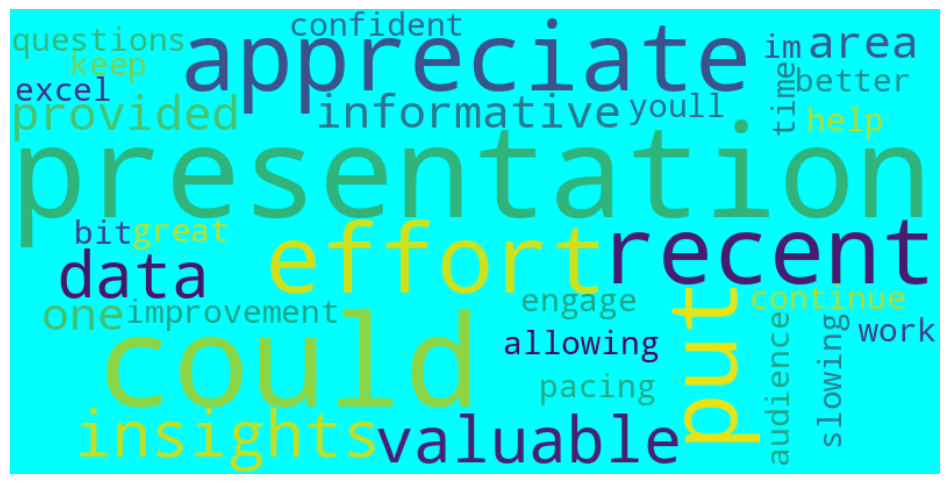

In [15]:
create_wordcloud(cloud1_dist)

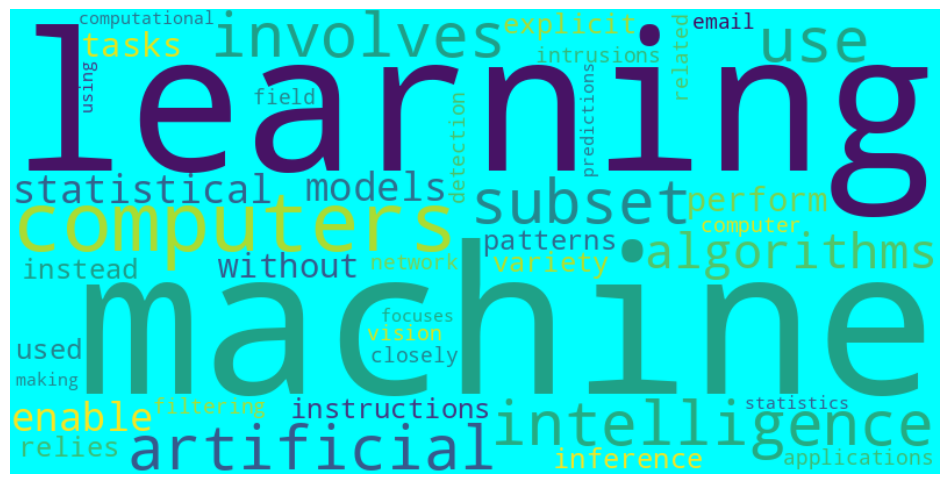

In [16]:
create_wordcloud(cloud2_dist)

# # Lab work 2 for ChatBot

In [5]:
import nltk
from nltk.chat.util import Chat, reflections
import warnings 

In [6]:
reflections = {
  "hello"       : "Hi",
  "i want"      : "you want",
  "i"          : "you",
  "i'm"        : "you are",
  "i'd"        : "you would",
  "i've"       : "you have",
  "i'll"       : "you will",
  "my"         : "your",
  "you are"    : "I am",
  "you were"   : "I was",
  "you've"     : "I have",
  "you'll"     : "I will",
  "your"       : "my",
  "yours"      : "mine",
  "you"        : "me",
  "me"         : "you"
}

In [7]:
pairs = [
    [
        r"my name is (.*)",
        ["Hello %1, How are you today ?",]
    ],
    [
        r"hi|hey|hello",
        ["Hello", "Hey there",]
    ], 
    [
        r"what is your name ?",
        ["I am a bot created by ashish. my nick name is Airai!",]
    ],
    [
        r"how are you ?",
        ["I'm doing great and what about  You ?",]
    ],
    [
        r"sorry (.*)",
        ["Its alright","Its OK, never mind",]
    ],
    [
        r"I am fine",
        ["I am also always fine. you need some help?",]
    ],
    [
        r"i'm (.*) doing good",
        ["Nice to hear that","How can I help you any issues that i can solve for you?)",]
    ],
    [
        r"(.*) age?",
        ["I am always sweet 16?",]
    ],
    [
        r"what (.*) want ?",
        ["talk to me for any help",]
    ],
    [
        r"(.*) created ?",
        ["Ashish created me using Python's NLTK library ","Now you also know it and create one for yourself ;)",]
    ],
    [
        r"(.*) you love ?",
        ['Talking Talking Talking and you?',]
    ],
    [
        r"You know Python (.*)?",
        ["Yes","This is silly Question","I know it so i can talk",]
    ],
    [
        r"i work in (.*)?",
        ["i am looking for job do you have any thing for me kidding!!!.",]
    ],
    [
        r"(.*)raining in (.*)",
        ["No rain since last week here in %2","Damn its raining too much here in %2"]
    ],
    [
        r"ok",
        ["Any help needed form me ",]
    ],
    [
        r"(.*) (sports|game) ?",
        ["I'm a very big fan of cricket",]
    ],
    [
        r"who (.*) sportsperson ?",
        ["Virat","Sachin",]
    ],
    [
        r"what do you do ?",
        ["I am virtual Assistant"]
    ],
    [
        r"my prepaid (.*)?",
        ["please dial 121 for prepaid related query"]
    ],
    [
        r"postpaid (.*)?",
        ["please dial 123 for postpaid related query"]
    ],
    [
        r"my Bill (.*)?",
        ["you can download you bill from www.airtel.com/mybill/self or dial 125 for bill related query"]
    ],
    [
        r"i am looking for online guides and courses to learn data science, can you suggest?",
        ["Crazy_Tech has many great articles with each step explanation along with code, you can explore"]
    ],
    [
        r"i am looking for online guides and courses to learn data science, can you suggest?",
        ["By take care. See you soon :) ","It was nice talking to you. See you soon :)"]
    ],
    [
        r"quit",
        ["By take care. See you soon :) ","It was nice talking to you. See you soon :)"]
    ],
]

In [4]:

def chatBot():
    print("Hi! I am Airai an AI bot for issue resolutions, How can i help you today?")
    chatBot = Chat(pairs, reflections)
    chatBot.converse()
#initiate the conversation
if __name__ == "__main__":
    chatBot() 

Hi! I am Airai an AI bot for issue resolutions, How can i help you today?


> Hi


Hello


> prepaid


None


> postpaid


None


> bill


None


> my bill


None


> my bill here


you can download you bill from www.airtel.com/mybill/self or dial 125 for bill related query


> quit


By take care. See you soon :) 
